## 1. Using Neural net for the private models

### 1. Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Loading the dataset
X_train = pd.read_csv('X_train.txt', delim_whitespace = True, header = None)
y_train = pd.read_csv('y_train.txt', delim_whitespace = True, header = None)
X_test = pd.read_csv('X_test.txt', delim_whitespace = True, header = None)
y_test = pd.read_csv('y_test.txt', delim_whitespace = True, header = None)

### 2. Data Preprocessing

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [ ]:
y_train.head()

,0
0,5
1,5
2,5
3,5
4,5


In [ ]:
# dictionary to store number to activity mappings
activity = { 1 : "WALKING", 2 : "WALKING_UPSTAIRS", 3 : "WALKING_DOWNSTAIRS", 4 : "SITTING", 5 : "STANDING", 6 : "LAYING" }

In [ ]:
activity

{1: 'WALKING',
 2: 'WALKING_UPSTAIRS',
 3: 'WALKING_DOWNSTAIRS',
 4: 'SITTING',
 5: 'STANDING',
 6: 'LAYING'}

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.20064157, -0.0636826 , -0.41962845, ..., -0.68721921,
         0.40794614, -0.00756789],
       [ 0.05594788,  0.03148567, -0.25390836, ..., -0.694138  ,
         0.40911698,  0.00787517],
       [ 0.07351535, -0.04341648, -0.07629468, ..., -0.702239  ,
         0.4102883 ,  0.02650234],
       ...,
       [-0.01566765,  0.0167814 ,  1.13222107, ..., -0.56584847,
         0.64059683,  0.34870928],
       [ 0.21586648, -0.02812252, -0.86770988, ..., -0.57766781,
         0.63147758,  0.29327564],
       [ 1.09620157,  0.12919873, -1.67268082, ..., -0.57392691,
         0.63274259,  0.33396081]])

In [ ]:
X_train.shape

(7352, 561)

In [ ]:
y_train.shape

(7352, 1)

In [ ]:
y_train = np.array(y_train).ravel()

In [ ]:
y_test = np.array(y_test).ravel()

In [ ]:
y_train.shape

(7352,)

In [ ]:
# One-Hot Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

for i in list(encoder.classes_):
    print(activity[i])

WALKING
WALKING_UPSTAIRS
WALKING_DOWNSTAIRS
SITTING
STANDING
LAYING


In [ ]:
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

In [ ]:
y_train.shape

(7352, 6)

In [ ]:
# Splitting the training data randomly into 2 parts
X_helper_1, X_helper_2, y_helper_1, y_helper_2 = train_test_split (X_train, y_train, test_size = 0.50, random_state = 0)

In [ ]:
X_helper_1.shape 

(3676, 561)

In [ ]:
y_helper_1.shape

(3676, 6)

In [ ]:
# Further splitting the training data to get four parts in all

X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split (X_helper_1, y_helper_1, test_size = 0.50, random_state = 0)

X_train_3, X_cross_val, y_train_3, y_cross_val = train_test_split (X_helper_2, y_helper_2, test_size = 0.50, random_state = 0)

In [ ]:
print("{} {}".format(X_train_1.shape, y_train_1.shape))
print("{} {}".format(X_train_2.shape, y_train_2.shape))
print("{} {}".format(X_train_3.shape, y_train_3.shape))
print("{} {}".format(X_cross_val.shape, y_cross_val.shape))

(1838, 561) (1838, 6)
(1838, 561) (1838, 6)
(1838, 561) (1838, 6)
(1838, 561) (1838, 6)


### 3. Traing three neural network models using the above obtained sets of data

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

model_1 = Sequential()

model_1.add(Dense(64,activation='relu',input_dim=X_train_1.shape[1]))
model_1.add(Dropout(0.25))
model_1.add(Dense(128,activation='relu'))
model_1.add(Dense(64,activation='relu'))
model_1.add(Dense(32,activation='relu'))
model_1.add(Dropout(0.25))
model_1.add(Dense(10,activation='relu'))
model_1.add(Dense(6,activation='softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                35968     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3

In [ ]:
# compiling the model
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# fit the model
hist_1 = model_1.fit(X_train_1, y_train_1,epochs = 30,batch_size = 32)

Epoch 1/30
58/58 [==============================] - 0s 1ms/step - loss: 1.2821 - accuracy: 0.4646
Epoch 2/30
58/58 [==============================] - 0s 1ms/step - loss: 0.7118 - accuracy: 0.7334
Epoch 3/30
58/58 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.8221
Epoch 4/30
58/58 [==============================] - 0s 1ms/step - loss: 0.3082 - accuracy: 0.8863
Epoch 5/30
58/58 [==============================] - 0s 1ms/step - loss: 0.2420 - accuracy: 0.9162
Epoch 6/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1793 - accuracy: 0.9391
Epoch 7/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1513 - accuracy: 0.9483
Epoch 8/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1214 - accuracy: 0.9581
Epoch 9/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1028 - accuracy: 0.9619
Epoch 10/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1112 - accuracy: 0.9614
Epoch 11/30
58/58 [

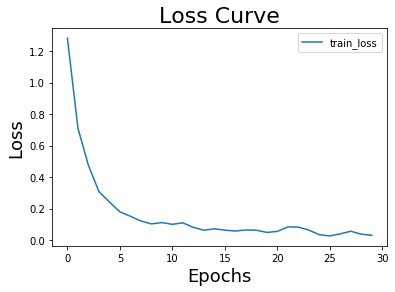

In [ ]:
# Loss vs number of epochs curve

plt.plot(hist_1.history['loss'],label='train_loss')
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.legend()
plt.title('Loss Curve',fontsize=22)
plt.show()

In [ ]:
# Checking test accuracy using model_1's predictions on X_test

predict = model_1.predict(X_test)

predictions = np.argmax(predict,axis=1)

score = accuracy_score(np.argmax(y_test,axis=1),predictions)

print(score)

0.9297590770274856


In [ ]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

model_2 = Sequential()

model_2.add(Dense(64,activation='relu',input_dim=X_train_2.shape[1]))
model_2.add(Dropout(0.25))
model_2.add(Dense(128,activation='relu'))
model_2.add(Dense(64,activation='relu'))
model_2.add(Dense(32,activation='relu'))
model_2.add(Dropout(0.25))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(6,activation='softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                35968     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [ ]:
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
hist_2 = model_2.fit(X_train_2, y_train_2,epochs = 30,batch_size = 32)

Epoch 1/30
58/58 [==============================] - 0s 1ms/step - loss: 1.2308 - accuracy: 0.4771
Epoch 2/30
58/58 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.7530
Epoch 3/30
58/58 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8575
Epoch 4/30
58/58 [==============================] - 0s 1ms/step - loss: 0.2925 - accuracy: 0.8955
Epoch 5/30
58/58 [==============================] - 0s 2ms/step - loss: 0.2426 - accuracy: 0.9206
Epoch 6/30
58/58 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9483
Epoch 7/30
58/58 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9423
Epoch 8/30
58/58 [==============================] - 0s 2ms/step - loss: 0.1410 - accuracy: 0.9521
Epoch 9/30
58/58 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.9576
Epoch 10/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1083 - accuracy: 0.9635
Epoch 11/30
58/58 [

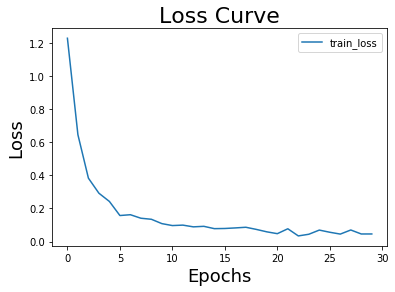

In [ ]:
# Loss vs number of epochs curve

plt.plot(hist_2.history['loss'],label='train_loss')
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.legend()
plt.title('Loss Curve',fontsize=22)
plt.show()

In [ ]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

model_3 = Sequential()

model_3.add(Dense(64,activation='relu',input_dim=X_train_3.shape[1]))
model_3.add(Dropout(0.25))
model_3.add(Dense(128,activation='relu'))
model_3.add(Dense(64,activation='relu'))
model_3.add(Dense(32,activation='relu'))
model_3.add(Dropout(0.25))
model_3.add(Dense(10,activation='relu'))
model_3.add(Dense(6,activation='softmax'))

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                35968     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [ ]:
model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
hist_3 = model_3.fit(X_train_3, y_train_3,epochs = 30,batch_size = 32)

Epoch 1/30
58/58 [==============================] - 0s 1ms/step - loss: 1.2521 - accuracy: 0.4630
Epoch 2/30
58/58 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.7530
Epoch 3/30
58/58 [==============================] - 0s 1ms/step - loss: 0.4118 - accuracy: 0.8433
Epoch 4/30
58/58 [==============================] - 0s 1ms/step - loss: 0.2993 - accuracy: 0.8939
Epoch 5/30
58/58 [==============================] - 0s 1ms/step - loss: 0.2521 - accuracy: 0.9217
Epoch 6/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1901 - accuracy: 0.9363
Epoch 7/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1589 - accuracy: 0.9440
Epoch 8/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1537 - accuracy: 0.9429
Epoch 9/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1135 - accuracy: 0.9625
Epoch 10/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1155 - accuracy: 0.9625
Epoch 11/30
58/58 [

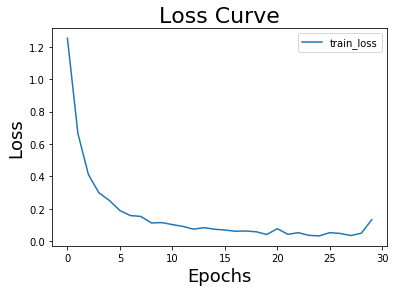

In [ ]:
# Loss vs number of epochs curve

plt.plot(hist_3.history['loss'],label='train_loss')
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.legend()
plt.title('Loss Curve',fontsize=22)
plt.show()

### 4. Extracting weights of the above trained neural network models

In [ ]:
weight_1 = model_1.get_weights()

In [ ]:
weight_2 = model_2.get_weights()

In [ ]:
weight_3 = model_3.get_weights()

In [ ]:
type(weight_3[0])

numpy.ndarray

### 5. Ensuring that all are of numpy array type and printing the weights extracted

In [ ]:
weight_1 = np.array([np.array(w) for w in weight_1])

In [ ]:
weight_1

array([array([[-0.06669091,  0.01645747,  0.0397069 , ..., -0.0148813 ,
        -0.00982757,  0.06387649],
       [-0.01980707,  0.04974011,  0.20472436, ..., -0.03499106,
        -0.04797845,  0.03721108],
       [-0.03906192, -0.05313908,  0.13101275, ...,  0.01046119,
         0.16436552, -0.09917301],
       ...,
       [-0.11810896,  0.220345  , -0.08431222, ..., -0.06916136,
        -0.08003748,  0.28489354],
       [ 0.05216761, -0.19371568, -0.13782567, ..., -0.01091872,
        -0.2078012 , -0.02632043],
       [-0.0337996 , -0.06618582, -0.01767673, ..., -0.01273754,
         0.01331797, -0.09032445]], dtype=float32),
       array([-0.01861711, -0.03044512, -0.04628704, -0.02598172, -0.05313181,
       -0.03306095, -0.04367094, -0.02608884, -0.02715161, -0.01081907,
       -0.04866124, -0.04764343, -0.00641373, -0.05266981,  0.00756908,
        0.00643501, -0.01517066, -0.06887852,  0.0139696 , -0.02471313,
       -0.08923133, -0.03211458, -0.0349004 , -0.02083473, -0.0525916

In [ ]:
weight_2 = np.array([np.array(w) for w in weight_2])

In [ ]:
weight_2

array([array([[-0.07381381, -0.00724182,  0.00977682, ..., -0.06795177,
        -0.05761538,  0.02023877],
       [-0.06426745,  0.1281407 ,  0.14401631, ..., -0.02950544,
        -0.03709323,  0.03305082],
       [-0.06354821, -0.1136631 ,  0.13985366, ...,  0.01786258,
         0.06689641, -0.02637495],
       ...,
       [-0.02550782,  0.1085229 ,  0.03213995, ..., -0.07983232,
         0.00708808,  0.28417793],
       [-0.08340213, -0.30264634, -0.09406251, ...,  0.01785661,
        -0.33094695, -0.03985434],
       [-0.0524386 , -0.19684331, -0.03212258, ...,  0.02324572,
        -0.02426382, -0.12999485]], dtype=float32),
       array([-0.02469951, -0.00489132, -0.05555944, -0.00223592, -0.05546435,
       -0.05427101, -0.01601381, -0.02873543, -0.01001306, -0.04243237,
       -0.01170348, -0.04321717, -0.02220621, -0.04707386, -0.0631338 ,
       -0.01100299,  0.03573543, -0.03770337, -0.00925502,  0.04071001,
       -0.03499534, -0.01560377, -0.04036097, -0.01149153, -0.0288832

In [ ]:
weight_3 = np.array([np.array(w) for w in weight_3])

In [ ]:
weight_3

array([array([[-0.06595409, -0.03691921,  0.04122243, ..., -0.08073899,
        -0.01672565,  0.07034391],
       [ 0.09278366,  0.07514503,  0.0792959 , ..., -0.06194186,
        -0.01115426, -0.01923598],
       [ 0.12502483,  0.00862872,  0.12539883, ...,  0.05302322,
         0.23660845, -0.12196727],
       ...,
       [-0.04091439, -0.01046363, -0.02060616, ..., -0.00852253,
         0.1266907 ,  0.280405  ],
       [-0.18125735, -0.1476506 , -0.05364977, ...,  0.04932927,
        -0.24528082,  0.02717634],
       [-0.06485441, -0.10840381, -0.02967827, ..., -0.07724315,
         0.03020116, -0.09154928]], dtype=float32),
       array([-4.2935204e-02, -7.1760677e-03, -5.9590925e-02, -7.5627320e-02,
       -5.9216265e-02, -7.6134264e-02, -4.3341629e-02, -2.2060804e-02,
       -2.9454460e-02, -5.1074434e-02, -5.5394847e-02, -5.8082105e-03,
       -3.0253831e-02, -4.4271551e-02, -5.6318924e-02, -5.5324521e-02,
       -3.2193687e-02, -5.7671193e-02, -1.7570538e-02,  1.5657766e-02,
  

### 6. Taking average of the extracted weights of the models

In [ ]:
weights = np.array([weight_1, weight_2, weight_3])

In [ ]:
averaged_weights = []
for weights_tuple in zip(*weights):
    averaged_weights.append([np.array(w).mean(axis = 0) for w in zip(*weights_tuple)])

In [ ]:
averaged_weights

[[array([-0.0688196 , -0.00923452,  0.03023539,  0.0020169 ,  0.16091968,
          0.13369508, -0.01941044, -0.04714148,  0.16573538,  0.02776015,
          0.06661314,  0.05516326,  0.02014629, -0.0696454 ,  0.01690667,
          0.03760317, -0.03539221, -0.05170093, -0.00572136, -0.07984964,
          0.08101506, -0.07490329, -0.00380662, -0.07766039,  0.06643463,
          0.06360144,  0.05408869,  0.07445084, -0.02472947,  0.08220825,
         -0.01965166,  0.1250849 , -0.01335418,  0.02298782, -0.04845511,
          0.05963591,  0.03743456, -0.06557986,  0.05097015, -0.08099812,
          0.1079128 ,  0.05241197,  0.0244105 ,  0.09451777, -0.1077171 ,
          0.05913308,  0.04365318, -0.04969697,  0.02806956,  0.07117946,
         -0.032454  ,  0.0087603 , -0.08592868,  0.03962759,  0.01925331,
          0.07666653,  0.00759437, -0.0237569 , -0.11012412,  0.04873164,
          0.03176088, -0.05452402, -0.0280562 ,  0.05148639], dtype=float32),
  array([ 2.90304678e-03,  8.43419

In [ ]:
type(averaged_weights[0])

list

In [ ]:
type(weights)

numpy.ndarray

In [ ]:
# converting into numpy array
averaged_weights = np.array([np.array(w) for w in averaged_weights])

### 7. Training a Neural Network with these Averaged weights

In [ ]:
model_ = Sequential()

model_.add(Dense(64,activation='relu'))
model_.add(Dropout(0.25))
model_.add(Dense(128,activation='relu'))
model_.add(Dense(64,activation='relu'))
model_.add(Dense(32,activation='relu'))
model_.add(Dropout(0.25))
model_.add(Dense(10,activation='relu'))
model_.add(Dense(6,activation='softmax'))
model_.build(input_shape = (1, 561))

In [ ]:
X_test.shape

(2947, 561)

In [ ]:
model_.set_weights(averaged_weights)

In [ ]:
# Making predictions on test set using the 
# model and finding the test accuracy

pred_ = model_.predict(X_test)

predictions_ = np.argmax(pred_, axis=1)

score_ = accuracy_score(np.argmax(y_test,axis=1), predictions_)

print("Test Accuracy using the model trained using the averaged weights is {}: %".format(score_*100))

Test Accuracy using the model trained using the averaged weights is 92.60264675941634: %


In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test,axis=1), predictions)

In [ ]:
cm

array([[486,   2,   8,   0,   0,   0],
       [ 24, 431,  15,   0,   1,   0],
       [ 27,  24, 368,   0,   1,   0],
       [  0,   2,   0, 408,  81,   0],
       [  0,   0,   0,  19, 513,   0],
       [  0,   0,   0,   0,   3, 534]])

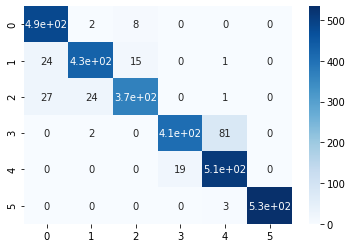

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot = True, cmap = 'Blues')

In [ ]:
pred_1 = model_.predict(X_cross_val)

predictions_1 = np.argmax(pred_1, axis=1)

score_1 = accuracy_score(np.argmax(y_cross_val,axis=1), predictions_1)

print("Test Accuracy using the model trained using the averaged weights is {}: %".format(score_1*100))

Test Accuracy using the model trained using the averaged weights is 95.6474428726877: %


In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(np.argmax(y_cross_val,axis=1), predictions_1)

In [ ]:
cm_1

array([[313,   0,   0,   0,   0,   0],
       [  2, 261,   0,   0,   0,   0],
       [  0,   2, 236,   0,   0,   0],
       [  0,   0,   0, 274,  63,   3],
       [  0,   0,   0,  10, 322,   0],
       [  0,   0,   0,   0,   0, 352]])

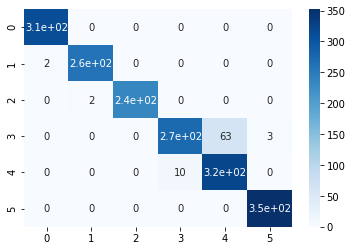

In [ ]:
import seaborn as sns
sns.heatmap(cm_1, annot = True, cmap = 'Blues')

## 2. Using SVM for the private models

### 1. Importing the libraries required

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Loading the dataset
X_train = pd.read_csv('X_train.txt', delim_whitespace = True, header = None)
y_train = pd.read_csv('y_train.txt', delim_whitespace = True, header = None)
X_test = pd.read_csv('X_test.txt', delim_whitespace = True, header = None)
y_test = pd.read_csv('y_test.txt', delim_whitespace = True, header = None)

### 2. Data Preprocessing

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [ ]:
y_train.head()

,0
0,5
1,5
2,5
3,5
4,5


In [ ]:
# dictionary to store number to activity mappings
activity = { 1 : "WALKING", 2 : "WALKING_UPSTAIRS", 3 : "WALKING_DOWNSTAIRS", 4 : "SITTING", 5 : "STANDING", 6 : "LAYING" }

In [ ]:
activity

{1: 'WALKING',
 2: 'WALKING_UPSTAIRS',
 3: 'WALKING_DOWNSTAIRS',
 4: 'SITTING',
 5: 'STANDING',
 6: 'LAYING'}

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.20064157, -0.0636826 , -0.41962845, ..., -0.68721921,
         0.40794614, -0.00756789],
       [ 0.05594788,  0.03148567, -0.25390836, ..., -0.694138  ,
         0.40911698,  0.00787517],
       [ 0.07351535, -0.04341648, -0.07629468, ..., -0.702239  ,
         0.4102883 ,  0.02650234],
       ...,
       [-0.01566765,  0.0167814 ,  1.13222107, ..., -0.56584847,
         0.64059683,  0.34870928],
       [ 0.21586648, -0.02812252, -0.86770988, ..., -0.57766781,
         0.63147758,  0.29327564],
       [ 1.09620157,  0.12919873, -1.67268082, ..., -0.57392691,
         0.63274259,  0.33396081]])

In [ ]:
X_train.shape

(7352, 561)

In [ ]:
y_train.shape

(7352, 1)

In [ ]:
y = np.array(y_train).ravel()

In [ ]:
y.shape

(7352,)

In [ ]:
# Splitting the training data randomly into 2 parts
X_helper_1, X_helper_2, y_helper_1, y_helper_2 = train_test_split (X_train, y, test_size = 0.50, random_state = 0)

In [ ]:
X_helper_1.shape 

(3676, 561)

In [ ]:
y_helper_1.shape

(3676,)

In [ ]:
# Further splitting the training data to get four parts in all

X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split (X_helper_1, y_helper_1, test_size = 0.50, random_state = 0)

X_train_3, X_cross_val, y_train_3, y_cross_val = train_test_split (X_helper_2, y_helper_2, test_size = 0.50, random_state = 0)

In [ ]:
print("{} {}".format(X_train_1.shape, y_train_1.shape))
print("{} {}".format(X_train_2.shape, y_train_2.shape))
print("{} {}".format(X_train_3.shape, y_train_3.shape))
print("{} {}".format(X_cross_val.shape, y_cross_val.shape))

(1838, 561) (1838,)
(1838, 561) (1838,)
(1838, 561) (1838,)
(1838, 561) (1838,)


### 3. Training three SVM models using the above obtained sets of data

In [ ]:
from sklearn.svm import SVC
classifier_1 = SVC(kernel = 'linear', random_state = 0)
classifier_1.fit(X_train_1, y_train_1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
classifier_2 = SVC(kernel = 'linear', random_state = 0)
classifier_2.fit(X_train_2, y_train_2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
classifier_3 = SVC(kernel = 'linear', random_state = 0)
classifier_3.fit(X_train_3, y_train_3)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_ = classifier_1.predict(X_test)
print(accuracy_score(y_test,y_))

0.9399389209365456


### 4. Predicting the results of the 4th public dataset using above three models

In [ ]:
y_pred_1 = classifier_1.predict(X_cross_val)
y_pred_2 = classifier_2.predict(X_cross_val)
y_pred_3 = classifier_3.predict(X_cross_val)

In [ ]:
y_train = np.array(y_train).ravel()

In [ ]:
y_test = np.array(y_test).ravel()

In [ ]:
# One-Hot Encoding 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
y_pred_1 = encoder.transform(y_pred_1)
y_pred_2 = encoder.transform(y_pred_2)
y_pred_3 = encoder.transform(y_pred_3)

print(encoder.classes_)

y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values
y_pred_1 = pd.get_dummies(y_pred_1).values
y_pred_2 = pd.get_dummies(y_pred_2).values
y_pred_3 = pd.get_dummies(y_pred_3).values

[1 2 3 4 5 6]


### 5. Training a Neural network using the above obtained model predictions 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()

model.add(Dense(64,activation='relu',input_dim=X_cross_val.shape[1]))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='relu'))
model.add(Dense(6,activation='softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 64)                35968     
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_67 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_68 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_69 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_23 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 10)              

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
hist_1 = model.fit(X_cross_val, y_pred_1,epochs = 30,batch_size = 32)

Epoch 1/30
58/58 [==============================] - 0s 2ms/step - loss: 1.2126 - accuracy: 0.4548
Epoch 2/30
58/58 [==============================] - 0s 1ms/step - loss: 0.5881 - accuracy: 0.7356
Epoch 3/30
58/58 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 0.8020
Epoch 4/30
58/58 [==============================] - 0s 1ms/step - loss: 0.2986 - accuracy: 0.8808
Epoch 5/30
58/58 [==============================] - 0s 1ms/step - loss: 0.2576 - accuracy: 0.8999
Epoch 6/30
58/58 [==============================] - 0s 1ms/step - loss: 0.2000 - accuracy: 0.9249
Epoch 7/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1855 - accuracy: 0.9320
Epoch 8/30
58/58 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.9538
Epoch 9/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1189 - accuracy: 0.9543
Epoch 10/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.9565
Epoch 11/30
58/58 [

In [ ]:
hist_2 = model.fit(X_cross_val, y_pred_2,epochs = 30,batch_size = 32)

Epoch 1/30
58/58 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9396
Epoch 2/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1463 - accuracy: 0.9499
Epoch 3/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1241 - accuracy: 0.9548
Epoch 4/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.9614
Epoch 5/30
58/58 [==============================] - 0s 1ms/step - loss: 0.0966 - accuracy: 0.9657
Epoch 6/30
58/58 [==============================] - 0s 1ms/step - loss: 0.0991 - accuracy: 0.9668
Epoch 7/30
58/58 [==============================] - 0s 2ms/step - loss: 0.1092 - accuracy: 0.9630
Epoch 8/30
58/58 [==============================] - 0s 2ms/step - loss: 0.0853 - accuracy: 0.9733
Epoch 9/30
58/58 [==============================] - 0s 2ms/step - loss: 0.0852 - accuracy: 0.9739
Epoch 10/30
58/58 [==============================] - 0s 1ms/step - loss: 0.0708 - accuracy: 0.9712
Epoch 11/30
58/58 [

In [ ]:
X_cross_val.shape

(1838, 561)

In [ ]:
y_pred_3.shape

(1838, 6)

In [ ]:
hist_3 = model.fit(X_cross_val, y_pred_3,epochs = 30,batch_size = 32)

Epoch 1/30
58/58 [==============================] - 0s 2ms/step - loss: 0.2125 - accuracy: 0.9412
Epoch 2/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.9538
Epoch 3/30
58/58 [==============================] - 0s 2ms/step - loss: 0.1022 - accuracy: 0.9614
Epoch 4/30
58/58 [==============================] - 0s 1ms/step - loss: 0.0930 - accuracy: 0.9641
Epoch 5/30
58/58 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9744
Epoch 6/30
58/58 [==============================] - 0s 1ms/step - loss: 0.0811 - accuracy: 0.9706
Epoch 7/30
58/58 [==============================] - 0s 1ms/step - loss: 0.0874 - accuracy: 0.9652
Epoch 8/30
58/58 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.9799
Epoch 9/30
58/58 [==============================] - 0s 1ms/step - loss: 0.0763 - accuracy: 0.9712
Epoch 10/30
58/58 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9788
Epoch 11/30
58/58 [

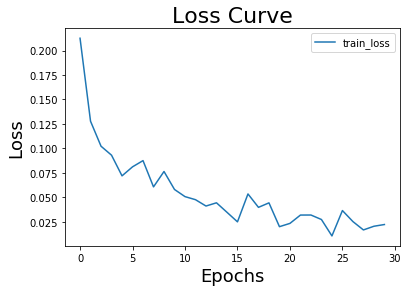

In [ ]:
# Loss vs number of epochs curve

plt.plot(hist_3.history['loss'],label='train_loss')
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.legend()
plt.title('Loss Curve',fontsize=22)
plt.show()

### 6. Predicting test set results using the final model 

In [ ]:
predict = model.predict(X_test)

predictions = np.argmax(predict,axis=1)

score = accuracy_score(np.argmax(y_test,axis=1),predictions)

print("Test Accuracy of the model is {}: %".format(score*100))

Test Accuracy of the model is 93.92602646759416: %


Thus, we have obtained a test set accuracy of approximately 93.9% using the above built model

### 7. Printing the confusion matrix to analyse the predictions better

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test,axis=1), predictions)

In [ ]:
cm

array([[469,   9,  18,   0,   0,   0],
       [  6, 455,  10,   0,   0,   0],
       [  5,   9, 406,   0,   0,   0],
       [  0,   3,   0, 418,  70,   0],
       [  0,   0,   0,  45, 487,   0],
       [  0,   0,   0,   0,   4, 533]])

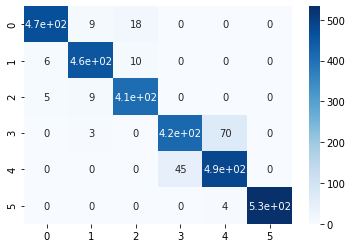

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot = True, cmap = 'Blues')

### 8. Using Model Averaging - Ensemble Learning

Taking average of the predictions obtained by the three trained SVM models and using this data to train a neural network.

In [ ]:
y_pred_1 = np.argmax(y_pred_1,axis=1)
y_pred_2 = np.argmax(y_pred_2,axis=1)
y_pred_3 = np.argmax(y_pred_3,axis=1)

In [ ]:
sum = (y_pred_1 + y_pred_2 + y_pred_3)
if(sum.any()%3):
    y_pred = sum//3 + 1
else:
    y_pred = sum//3

In [ ]:
X_cross_val.shape

(1838, 561)

In [ ]:
# One-Hot encoding
y_pred = encoder.transform(y_pred)
y_pred = pd.get_dummies(y_pred).values

In [ ]:
y_pred.shape

(1838, 6)

### 8-1. Training Neural Network model

In [ ]:
# Training the neural network with X_cross_val (of 4th public dataset) 
# and the average predictions obtained above
model_1 = Sequential()

model_1.add(Dense(64,activation='relu',input_dim=X_cross_val.shape[1]))
model_1.add(Dropout(0.25))
model_1.add(Dense(128,activation='relu'))
model_1.add(Dense(64,activation='relu'))
model_1.add(Dense(32,activation='relu'))
model_1.add(Dropout(0.25))
model_1.add(Dense(10,activation='relu'))
model_1.add(Dense(6,activation='softmax'))

model_1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 64)                35968     
_________________________________________________________________
dropout_24 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_73 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_74 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_75 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_25 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_76 (Dense)             (None, 10)              

In [ ]:
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
hist = model_1.fit(X_cross_val, y_pred,epochs = 30,batch_size = 32)

Epoch 1/30
58/58 [==============================] - 0s 1ms/step - loss: 1.1725 - accuracy: 0.5087
Epoch 2/30
58/58 [==============================] - 0s 1ms/step - loss: 0.5556 - accuracy: 0.7399
Epoch 3/30
58/58 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.8297
Epoch 4/30
58/58 [==============================] - 0s 1ms/step - loss: 0.2927 - accuracy: 0.8743
Epoch 5/30
58/58 [==============================] - 0s 1ms/step - loss: 0.2759 - accuracy: 0.8836
Epoch 6/30
58/58 [==============================] - 0s 1ms/step - loss: 0.2018 - accuracy: 0.9189
Epoch 7/30
58/58 [==============================] - 0s 2ms/step - loss: 0.1667 - accuracy: 0.9358
Epoch 8/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1309 - accuracy: 0.9510
Epoch 9/30
58/58 [==============================] - 0s 1ms/step - loss: 0.1869 - accuracy: 0.9325
Epoch 10/30
58/58 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9402
Epoch 11/30
58/58 [

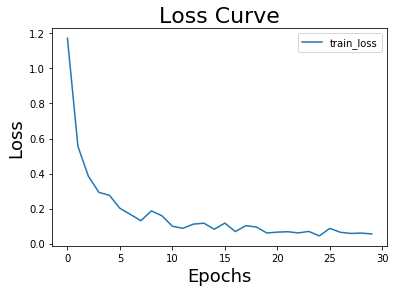

In [ ]:
# Loss vs number of epochs curve

plt.plot(hist.history['loss'],label='train_loss')
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.legend()
plt.title('Loss Curve',fontsize=22)
plt.show()

In [ ]:
# Predicting the test set results
predict1 = model_1.predict(X_test)

predictions1 = np.argmax(predict1,axis=1)

score1 = accuracy_score(np.argmax(y_test,axis=1),predictions1)

print("Test Accuracy of the model is: {} %".format(score1*100))

Test Accuracy of the model is: 92.26331862911435 %


In [ ]:
# Printing the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(np.argmax(y_test,axis=1), predictions1)

In [ ]:
cm_1

array([[468,   9,  19,   0,   0,   0],
       [  9, 429,  32,   0,   1,   0],
       [  3,  16, 400,   1,   0,   0],
       [  0,   2,   0, 460,  29,   0],
       [  0,   2,   0,  94, 436,   0],
       [  7,   2,   0,   0,   2, 526]])

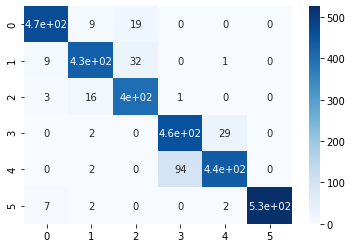

In [ ]:
import seaborn as sns
sns.heatmap(cm_1, annot = True, cmap = 'Blues')

Thus, we have obtained a test set accuracy of approximately 92.26% using the above built model

### 8-2 Training SVM Model

In [ ]:
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
y_pred.shape

(1838,)

In [ ]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_cross_val, y_pred)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting test set results
predict2 = classifier.predict(X_test)

In [ ]:
cm_2 = confusion_matrix(np.argmax(y_test,axis=1), predict2)
print(cm_2)

[[487   6   3   0   0   0]
 [ 39 429   3   0   0   0]
 [ 16  23 381   0   0   0]
 [  0   2   0 441  48   0]
 [  0   0   0  89 443   0]
 [  0   0   0   0   0 537]]


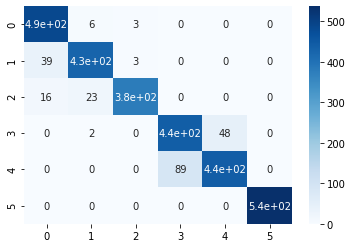

In [ ]:
# Printing the confusion matrix
import seaborn as sns
sns.heatmap(cm_2, annot = True, cmap = 'Blues')

In [ ]:
score2 = accuracy_score(np.argmax(y_test,axis=1),predict2)

In [ ]:
print(score2)

0.9222938581608415


Thus, we have obtained a test set accuracy of approximately 92.22% using the above built model